<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b2a05acc4120>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
# Prepare age groups
bins = [0, 35, 70, 100]
labels = ['<=35 years', '36-70 years', '70+ years']
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

### Q1: Is there a significant difference in the median value of houses bounded by the Charles river or not?

In [7]:
# Grouping Charles River variable for t-test
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
ttest_result = stats.ttest_ind(group1, group0)
ttest_result

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Since the p-value *(7.39e-05)* is much smaller than 0.05, we reject the null hypothesis that there is no difference in median home values between houses bounded by the Charles River and those not bounded by it.
#### **Conclusion:** There is a statistically significant difference in median house values based on proximity to the Charles River.

### Q2: Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

In [8]:
# ANOVA between AGE groups and MEDV
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == '<=35 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '36-70 years']['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == '70+ years']['MEDV']
)
anova_result

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

#### The extremely low p-value *(1.71e-15)* indicates strong evidence to reject the null hypothesis of equal median house values across the AGE groups.
#### **Conclusion:** There is a statistically significant difference in median house values among different proportions of older houses (built before 1940).

### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

In [9]:
# Pearson correlation between NOX and INDUS
pearson_corr, pearson_p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(pearson_corr, pearson_p)

0.7636514469209192 7.913361061210442e-98


#### The positive correlation coefficient close to 0.76 indicates a strong positive linear relationship between nitric oxide concentration and the proportion of non-retail business acres. The extremely small p-value *(7.91e-98)* means this relationship is statistically significant.
#### **Conclusion:** We reject the hypothesis that there is no relationship and conclude there is a strong, statistically significant positive association between NOX and INDUS.

### Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [10]:
# Regression analysis: DIST to employment centers vs MEDV
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
regression_model = sm.OLS(y, X).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 08 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        15:48:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### The positive coefficient *(1.09)* means that for each additional unit increase in weighted distance to employment centers, the median home value increases by approximately *1090 USD* (since MEDV is in *1000's USD*). The p-value *(1.21e-08)* is very small, indicating this effect is statistically significant.
#### However, the R-squared is 0.062, meaning only about 6.2% of the variability in median home values is explained by distance alone—so other factors also play a large role.
#### **Conclusion:** There is a statistically significant but small positive effect of distance to employment centers on median home values.

In [11]:
# Collecting all outputs
test_results = {
    "T-test (Charles River)": {
        "p-value": ttest_result.pvalue,
        "significant": ttest_result.pvalue < 0.05
    },
    "ANOVA (AGE groups)": {
        "p-value": anova_result.pvalue,
        "significant": anova_result.pvalue < 0.05
    },
    "Pearson Correlation (NOX vs INDUS)": {
        "correlation": pearson_corr,
        "p-value": pearson_p,
        "significant": pearson_p < 0.05
    },
    "Regression (DIS vs MEDV)": {
        "coef": regression_model.params['DIS'],
        "p-value": regression_model.pvalues['DIS'],
        "r-squared": regression_model.rsquared,
        "significant": regression_model.pvalues['DIS'] < 0.05
    }
}
test_results

{'T-test (Charles River)': {'p-value': 7.390623170519905e-05,
  'significant': True},
 'ANOVA (AGE groups)': {'p-value': 1.7105011022702984e-15,
  'significant': True},
 'Pearson Correlation (NOX vs INDUS)': {'correlation': 0.7636514469209192,
  'p-value': 7.913361061210442e-98,
  'significant': True},
 'Regression (DIS vs MEDV)': {'coef': 1.091613015841107,
  'p-value': 1.2066117273372235e-08,
  'r-squared': 0.062464372121781686,
  'significant': True}}

In [12]:
results_df = pd.DataFrame(test_results).T
print(results_df)

                                     p-value significant correlation  \
T-test (Charles River)              0.000074        True         NaN   
ANOVA (AGE groups)                       0.0        True         NaN   
Pearson Correlation (NOX vs INDUS)       0.0        True    0.763651   
Regression (DIS vs MEDV)                 0.0        True         NaN   

                                        coef r-squared  
T-test (Charles River)                   NaN       NaN  
ANOVA (AGE groups)                       NaN       NaN  
Pearson Correlation (NOX vs INDUS)       NaN       NaN  
Regression (DIS vs MEDV)            1.091613  0.062464  


### **Visualizations:**

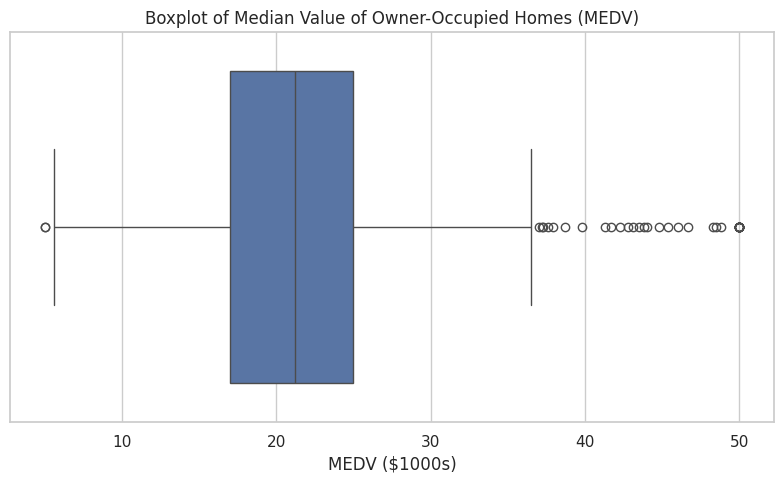

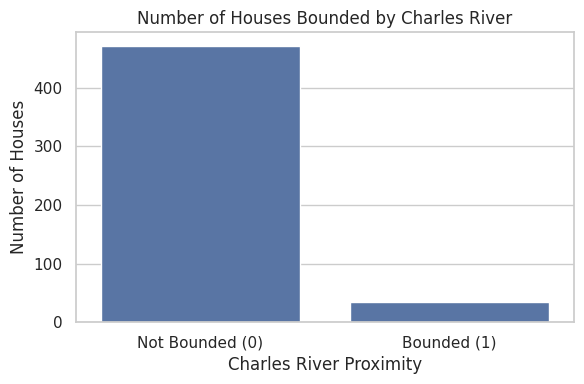

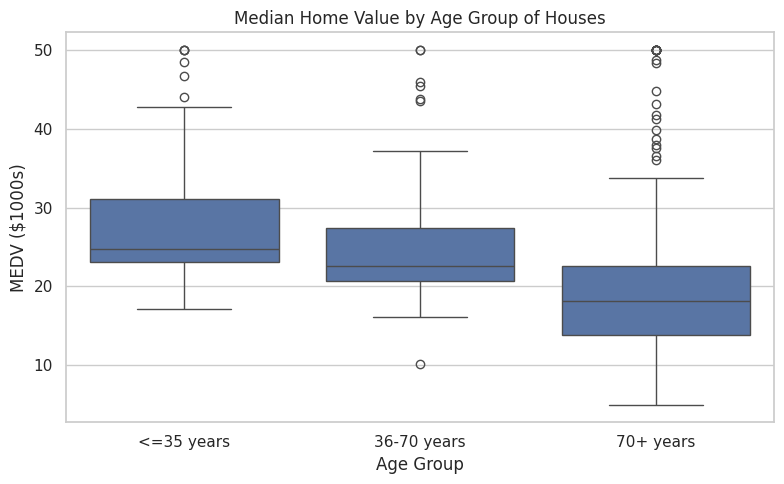

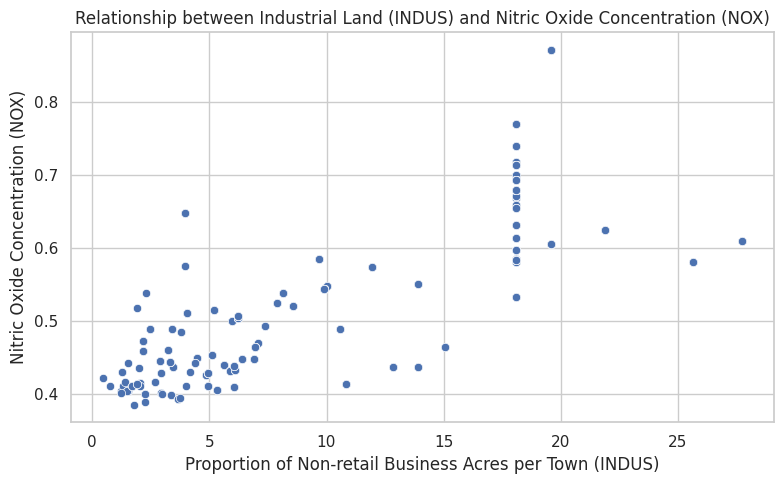

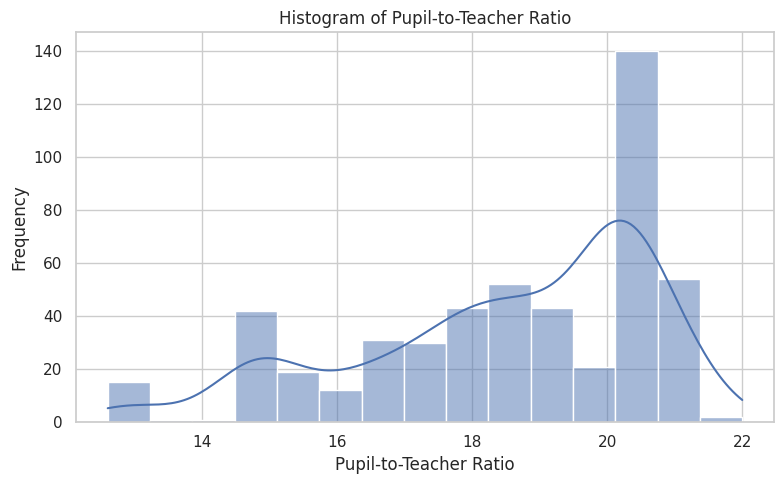

In [13]:
# Set plot style
sns.set(style="whitegrid")

# Boxplot for MEDV
plt.figure(figsize=(8, 5))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV ($1000s)')
plt.tight_layout()
plt.show()

# Bar plot for CHAS (Charles River dummy variable)
plt.figure(figsize=(6, 4))
chas_counts = boston_df['CHAS'].value_counts().sort_index()
chas_counts.index = ['Not Bounded (0)', 'Bounded (1)']
sns.barplot(x=chas_counts.index, y=chas_counts.values)
plt.title('Number of Houses Bounded by Charles River')
plt.ylabel('Number of Houses')
plt.xlabel('Charles River Proximity')
plt.tight_layout()
plt.show()

# Boxplot for MEDV vs AGE group
plt.figure(figsize=(8, 5))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
plt.title('Median Home Value by Age Group of Houses')
plt.xlabel('Age Group')
plt.ylabel('MEDV ($1000s)')
plt.tight_layout()
plt.show()

# Scatter plot: NOX vs INDUS
plt.figure(figsize=(8, 5))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Relationship between Industrial Land (INDUS) and Nitric Oxide Concentration (NOX)')
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')
plt.tight_layout()
plt.show()

# Histogram for PTRATIO (Pupil-Teacher Ratio)
plt.figure(figsize=(8, 5))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()